# PREPROCESS

In [ ]:
from PIL import Image
from glob import glob
from tqdm import tqdm
import os

In [16]:
OUTPUT_SIZE = (512, 340)
OUTPUT_DIR = '../input/images_res/'

In [ ]:
if not os.path.exists(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)

In [2]:
pathes = glob('../input/images/*.jpg')

In [4]:
for path in tqdm(pathes):
    image = Image.open(path)
    if image.height > image.width:
        image = image.transpose(Image.ROTATE_90)
    image = image.resize(OUTPUT_SIZE, Image.BICUBIC)
    image.save(OUTPUT_DIR + os.path.basename(path))

100%|██████████| 3642/3642 [00:00<00:00, 20157.15it/s]


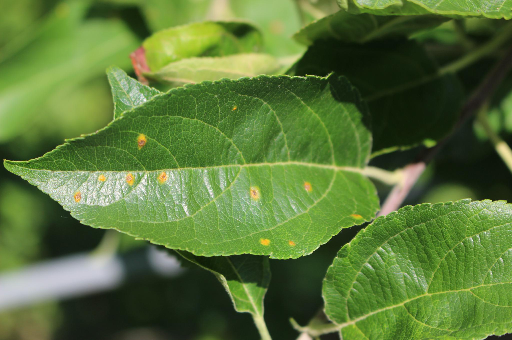

In [14]:
img = Image.open(pathes[0])
img.resize([512, 340], PIL.Image.BICUBIC)

# CREATE FOLDS

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [17]:
FEATURES = 'image_id'

In [18]:
df = pd.read_csv('../input/train.csv')
df['kfold'] = np.nan
df = df.sample(frac=1).reset_index(drop=True)

X = df[FEATURES].values
y = df.iloc[:, 2] + df.iloc[:, 3] * 2 + df.iloc[:, 4] * 3

In [19]:
y.value_counts()

2    621
3    591
0    515
1     90
dtype: int64

In [20]:
skf = StratifiedKFold(n_splits=5, random_state=42)
for fold, (train, valid) in enumerate(skf.split(X, y)):
    df.loc[valid, 'kfold'] = fold

print(df['kfold'].value_counts(dropna=False))

0.0    365
4.0    363
3.0    363
2.0    363
1.0    363
Name: kfold, dtype: int64


In [21]:
print(df.head())

     image_id  healthy  multiple_diseases  rust  scab  kfold
0   Train_968        1                  0     0     0    0.0
1  Train_1421        0                  0     0     1    0.0
2   Train_927        0                  0     0     1    0.0
3  Train_1150        0                  0     1     0    0.0
4   Train_572        1                  0     0     0    0.0


# DATASET